<a href="https://colab.research.google.com/github/Preeti-sahani/ShapeAI_Project/blob/main/Project_resume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [160]:
Github_df = pd.read_csv("/content/Github_data.csv")
Github_df

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,1.0,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,17.0,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,0.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,0.0,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,0.0,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,295,95,sensor,react-native-sensor-manager,kprimice,199,53,7,19,5,0.0,[],Native sensors access for react-native,NaN,45,1,0,0,0,Fetching contributors,https://github.com/kprimice/react-native-senso...
1496,296,96,sensor,weatherstation,androidthings,199,72,31,4,0,0.0,"['android-things', 'google-cloud-pubsub']",Sensor-based peripheral sample using Android T...,NaN,64,2,0,0,0,Apache-2.0,https://github.com/androidthings/weatherstation
1497,297,97,sensor,OctoPrint-Enclosure,vitormhenrique,198,77,32,63,2,0.0,"['temperature-sensor', 'enclosure', 'raspberry...",OctoPrint Enclosure Plugin,NaN,415,3,0,0,38,GPL-3.0,https://github.com/vitormhenrique/OctoPrint-En...
1498,298,98,sensor,SensorDashboard,pocmo,197,110,25,0,0,0.0,[],A sensor dashboard for Android plotting all se...,NaN,103,2,0,0,0,Apache-2.0,https://github.com/pocmo/SensorDashboard


In [161]:
Github_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1500 non-null   int64  
 1   Unnamed: 0.1      1500 non-null   int64  
 2   topic             1500 non-null   object 
 3   name              1500 non-null   object 
 4   user              1500 non-null   object 
 5   star              1500 non-null   object 
 6   fork              1500 non-null   object 
 7   watch             1500 non-null   object 
 8   issue             1500 non-null   object 
 9   pull_requests     1500 non-null   object 
 10  projects          1313 non-null   float64
 11  topic_tag         1500 non-null   object 
 12  discription_text  1480 non-null   object 
 13  discription_url   669 non-null    object 
 14  commits           1500 non-null   object 
 15  branches          1500 non-null   object 
 16  packages          1500 non-null   int64  


In [162]:
Github_df_max = Github_df['star'].str.contains('k').all()
Github_df_max

False

In [163]:
Github_df.head()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,1.0,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,17.0,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,0.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,0.0,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,0.0,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


In [164]:
Github_df.tail()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
1495,295,95,sensor,react-native-sensor-manager,kprimice,199,53,7,19,5,0.0,[],Native sensors access for react-native,NaN,45,1,0,0,0,Fetching contributors,https://github.com/kprimice/react-native-senso...
1496,296,96,sensor,weatherstation,androidthings,199,72,31,4,0,0.0,"['android-things', 'google-cloud-pubsub']",Sensor-based peripheral sample using Android T...,NaN,64,2,0,0,0,Apache-2.0,https://github.com/androidthings/weatherstation
1497,297,97,sensor,OctoPrint-Enclosure,vitormhenrique,198,77,32,63,2,0.0,"['temperature-sensor', 'enclosure', 'raspberry...",OctoPrint Enclosure Plugin,NaN,415,3,0,0,38,GPL-3.0,https://github.com/vitormhenrique/OctoPrint-En...
1498,298,98,sensor,SensorDashboard,pocmo,197,110,25,0,0,0.0,[],A sensor dashboard for Android plotting all se...,NaN,103,2,0,0,0,Apache-2.0,https://github.com/pocmo/SensorDashboard
1499,299,99,sensor,BME680_driver,BoschSensortec,197,61,44,2,0,NaN,[],BME680 sensor driver / API including example g...,https://community.bosch-sensortec.com/t5/Bosch...,28,1,0,0,11,BSD-3-Clause,https://github.com/BoschSensortec/BME680_driver


In [165]:
Github_df['star'].describe()

count     1500
unique     629
top       1.6k
freq        41
Name: star, dtype: object

### Column **Star, Fork, Watch** conatains number **(1.2K)** format, we need to convert into **(1200)** format

In [166]:
Github_df['star'] = Github_df['star'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)
Github_df['fork'] = Github_df['fork'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)
Github_df['watch'] = Github_df['watch'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)

In [167]:
#popular_repos= Github_df[Github_df['star'] > 40#.0]
#len(popular_repos)

In [168]:
popular_repos.head() 

,sub_index,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,Data-Science,keras,keras-team,47.9,18.1k,2.1k,"2,940",87,1.0,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,Data-Science,scikit-learn,scikit-learn,40.3,19.6k,2.2k,"1,505",764,17.0,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1,9.9k,1.5k,65,67,0.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21.0,6.6k,1.4k,127,38,0.0,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4,8.2k,1.5k,7,0,0.0,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


### Repository star distribution topic wise****

In [169]:
Github_df['star'] = Github_df['star'].astype(float)
star_topicwise = Github_df.groupby('topic').sum()['star']
fig = px.bar(star_topicwise,x=star_topicwise.index,y="star",color=star_topicwise.index)
fig.show()

### Repository Fork distribution

In [170]:
Github_df['fork'] = Github_df['fork'].astype(float)
fork_topicwise = Github_df.groupby('topic').sum()['fork']
fig = px.bar(fork_topicwise,x=fork_topicwise.index,y="fork",color=fork_topicwise.index)
fig.show()

### Repository watch distribution

In [171]:
Github_df['watch'] = Github_df['watch'].astype(float)
watch_topicwise = Github_df.groupby('topic').sum()['watch']
fig = px.bar(watch_topicwise,x=watch_topicwise.index,y="watch",color=watch_topicwise.index)
fig.show()

* we can see same similarity in topic-wise here like star and fork

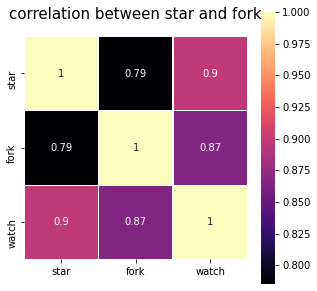

In [172]:
colormap = plt.cm.magma
plt.figure(figsize=(5,5))
plt.title('correlation between star and fork', y=1.05, size=15)
sns.heatmap(Github_df[['star','fork','watch']].corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

* star and watch are more correlatd (0.9)
* star and fork is less correlated compare to other two

**(Star & watch) > (Fork & watch) > (star > fork)**

### All numeric columns correlation

In [181]:
License_distribution = Github_df["License"].apply(lambda x: x if'\n' not in x else None).value_counts()
fig = px.bar(y=License_distribution.values, x=License_distribution.index)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

ValueError: ignored

In [ ]:
issue_topicwise = Github_data.groupby('topic').sum()['issue']
fig = px.bar(issue_topicwise,x=issue_topicwise.index,y="issue",color=issue_topicwise.index)
fig.show()

In [ ]:
tags_list.head()

### Repository Fork distribution

In [ ]:
Github_df['fork'] = Github_df['fork'].astype(str)
fork_topicwise = Github_df.groupby('topic').sum()['fork']
fig = px.bar(fork_topicwise,x=fork_topicwise.index,y="fork",color=fork_topicwise.index)
fig.show()

In [ ]:

machine_data_count=0
mach=[]
tags=['machine-learning', 'jupyter','jupter-notebook', 'tensorflow','data-science','data-analytics']
for item in tags_list:
    if set(tags).intersection(item):
        machine_data_count+=1
        mach.append(item)
machine_data_count